# Breast Cancer

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Descriptive Analysis

This *Breast Cancer* dataset can be used to predict if a patient has a "reurrence-events" or "no-recurrence-events", i.e. give a malignant or benign diagnosis.

It includes
- **breast-cancer-diagnostic.shuf.lrn.csv**: training dataset
- **breast-cancer-diagnostic.shuf.tes.csv**: test/validation dataset 
- **breast-cancer-diagnostic.shuf.sol.ex.csv**: sample solutions

In [134]:
datafolder = "../../datasets/BreastCancer"

BC_training_file = datafolder + "/breast-cancer-diagnostic.shuf.lrn.csv"
BC_validation_file = datafolder + "/breast-cancer-diagnostic.shuf.tes.csv"
BC_sample_solution_file = datafolder + "/breast-cancer-diagnostic.shuf.sol.ex.csv"

BC_training = pd.read_csv(BC_training_file)
BC_validation = pd.read_csv(BC_validation_file)
BC_sample_solution = pd.read_csv(BC_sample_solution_file)

BC_training.head()

,ID,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,8813129,False,13.27,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.024560,...,15.14,23.60,98.84,708.8,0.1276,0.1311,0.17860,0.09678,0.2506,0.07623
1,898678,False,12.06,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,...,13.64,27.06,86.54,562.6,0.1289,0.1352,0.04506,0.05093,0.2880,0.08083
2,917896,False,13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.037830,...,15.11,25.63,99.43,701.9,0.1425,0.2566,0.19350,0.12840,0.2849,0.09031
3,869691,True,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.074150,...,13.74,26.38,91.93,591.7,0.1385,0.4092,0.45040,0.18650,0.5774,0.10300
4,9110127,True,18.03,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.062540,...,20.38,22.02,133.30,1292.0,0.1263,0.2666,0.42900,0.15350,0.2842,0.08225


In [135]:
print(f"""
The training dataset has following properties:
    - Number of Instances: {BC_training.shape[0]}
    - Number of Features: {BC_training.shape[1]-1}
    - Number of Target Attributes: 1
    - Number of Dimensions: {BC_training.ndim}
    - Has missing values: {'yes' if BC_training.isnull().sum().sum() > 0 else 'no'}
    - Types of attributes: {BC_training.dtypes.value_counts().to_dict()}
    - Duplicate Instances: {BC_training.duplicated().sum()}
""")

print(f"""
The validation dataset has following properties:
    - Number of Instances: {BC_validation.shape[0]}
    - Has missing values: {'yes' if BC_validation.isnull().sum().sum() > 0 else 'no'}
    - Duplicate Instances: {BC_validation.duplicated().sum()}
""")




The training dataset has following properties:
    - Number of Instances: 285
    - Number of Features: 31
    - Number of Target Attributes: 1
    - Number of Dimensions: 2
    - Has missing values: no
    - Types of attributes: {dtype('float64'): 30, dtype('int64'): 1, dtype('bool'): 1}
    - Duplicate Instances: 0


The validation dataset has following properties:
    - Number of Instances: 284
    - Has missing values: no
    - Duplicate Instances: 0



### Attributes

In [136]:
print(f"{'Attribute':<25} {'Data Type':<10} {'Missing Values':<15} {'Min':<10} {'Max'}")
print("-" * 70)
for col in BC_training.columns:
    print(f"{col:<25} {str(BC_training[col].dtype):<10} {BC_training[col].isnull().sum():<15} {BC_training[col].min():<10} {BC_training[col].max()}")

Attribute                 Data Type  Missing Values  Min        Max
----------------------------------------------------------------------
ID                        int64      0               8670       911320501
class                     bool       0               0          True
radiusMean                float64    0               6.981      27.42
 textureMean              float64    0               10.38      39.28
 perimeterMean            float64    0               43.79      186.9
 areaMean                 float64    0               143.5      2501.0
 smoothnessMean           float64    0               0.05263    0.1634
 compactnessMean          float64    0               0.01938    0.3454
 concavityMean            float64    0               0.0        0.4108
 concavePointsMean        float64    0               0.0        0.1689
 symmetryMean             float64    0               0.1215     0.304
 fractalDimensionMean     float64    0               0.05025    0.09502
 radiusStdE

- **ID** (*Integer*): Each record has a unique identifier, which is not a predictive feature but used for reference.
- **class** (*Boolean*): Target attribute indicating whether the tumor is malignant (True) or benign (False).
- All other *numerical* attributes are cell nucleus features, and each measurement (e.g. `radius` or `texture`) appears in three variants:
    - **Mean**: average value across all cells
    - **StdErr**: standard error of the mean (variation of the measurement)
    - **Worst**: largest value observed amoung the cells (indicating extreme abnormality)

#### Clean Column Names

In [137]:
BC_training.rename(columns=lambda x: x.strip(), inplace=True)
BC_validation.rename(columns=lambda x: x.strip(), inplace=True)

print("Striped whitespace from column names.")

Striped whitespace from column names.


## Visualisations

Text(0.5, 1.0, 'Class Distribution in Training Set')

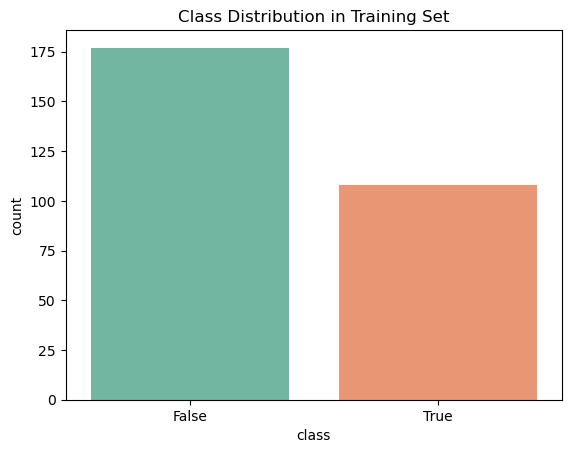

In [138]:
sns.countplot(x='class', data=BC_training, palette='Set2')
plt.title('Class Distribution in Training Set')

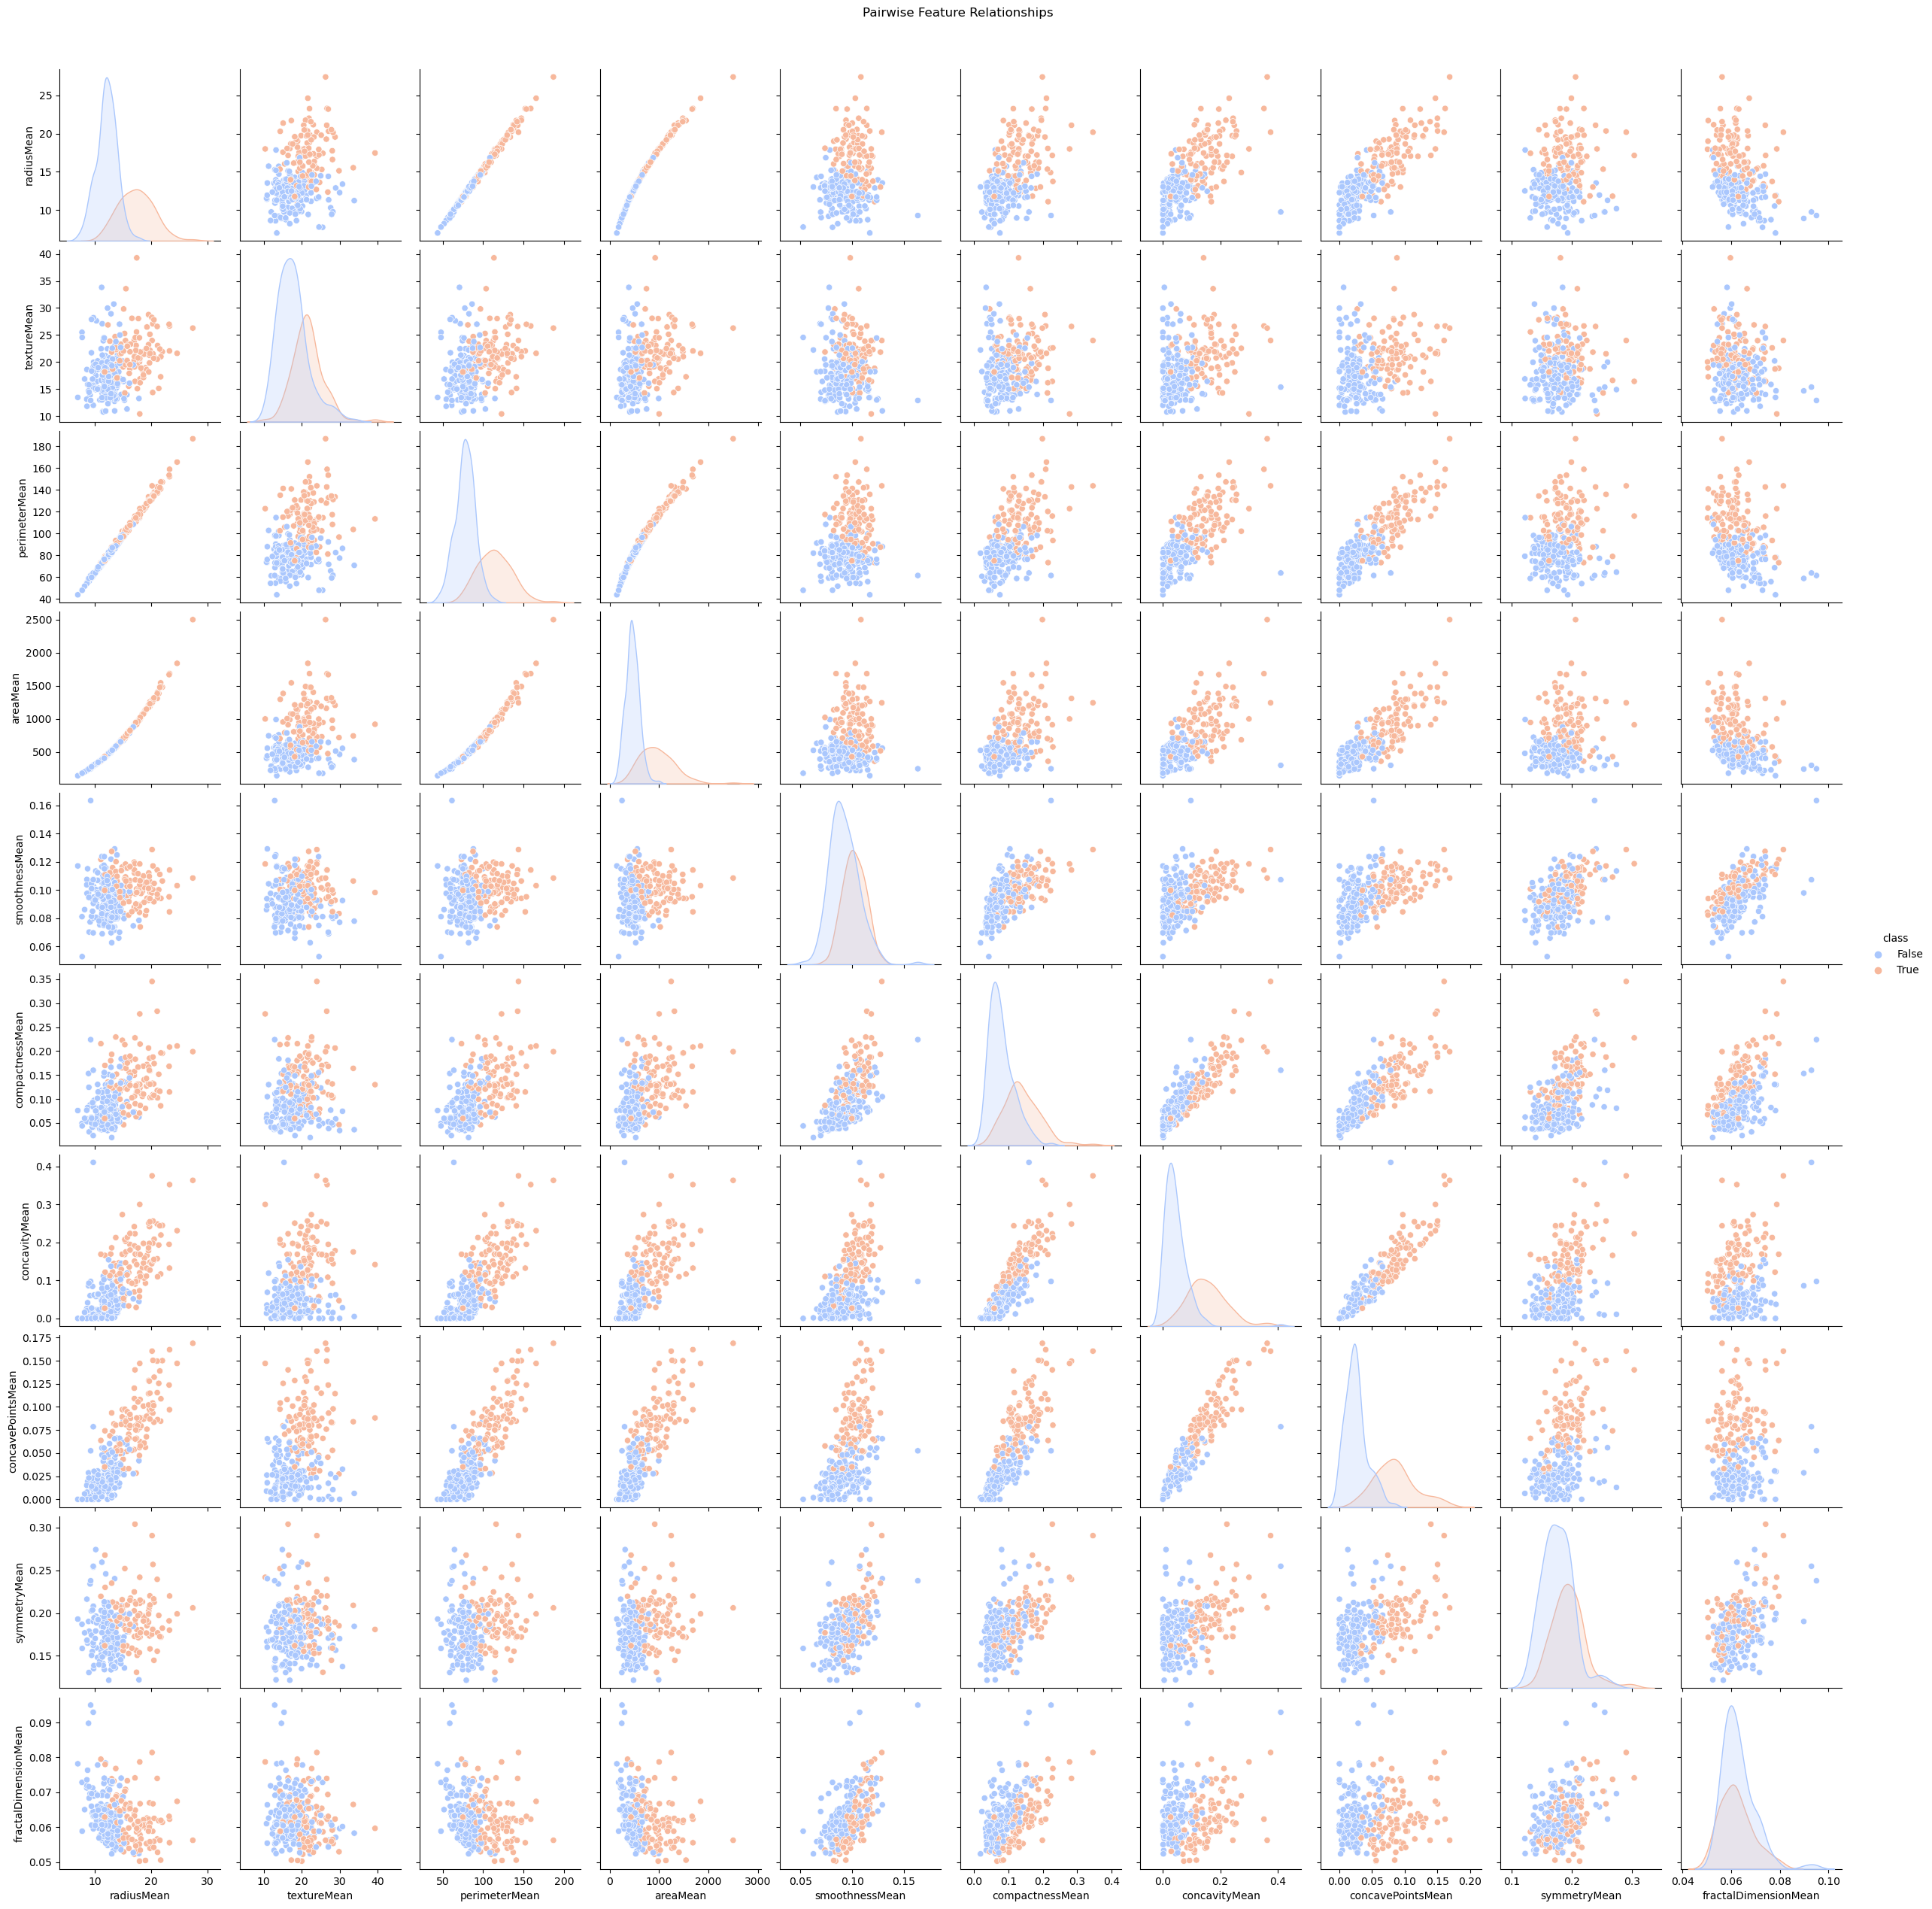

In [139]:
sample_features = ['radiusMean', 'textureMean', 'perimeterMean', 'areaMean', 'smoothnessMean', 'compactnessMean', 'concavityMean', 'concavePointsMean', 'symmetryMean', 'fractalDimensionMean', 'class']
sns.pairplot(BC_training[sample_features], hue='class', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()

**Observations**

1. High overlap between points of both classes 
    - features alone are not enough to classify tumors reliably
    - e.g. fractalDimensionMean <-> symmetryMean
2. Class separation 
    - features have strong predictive power
    - e.g. concavityMean <-> concavePointsMean
3. Correlations = straight diagonal pattern
    - e.g. radiusMean <-> perimeterMean
4. Outliers

## Preprocessing

In [140]:
from sklearn.preprocessing import StandardScaler

We now start preprocessing the data in the training dataset. 

Note: We do not need to handle *missing values* and we do not need to remove any *duplicates*

### Identify Target and Features

In [141]:
if 'ID' in BC_training.columns:
    BC_training = BC_training.drop(columns=['ID'])
    print("Dropped ID column from training set.")

Dropped ID column from training set.


### Missing Values & Duplicates

Nothing to do, no missing values or duplicates in the training set.

### Encode Target

In [142]:
BC_training['class'] = BC_training['class'].astype(int)
print("Converted 'class' column to integer type.")

Converted 'class' column to integer type.


### Redundant Features & Correlation

In [143]:
CORRELATION_THRESHOLD = 0.9

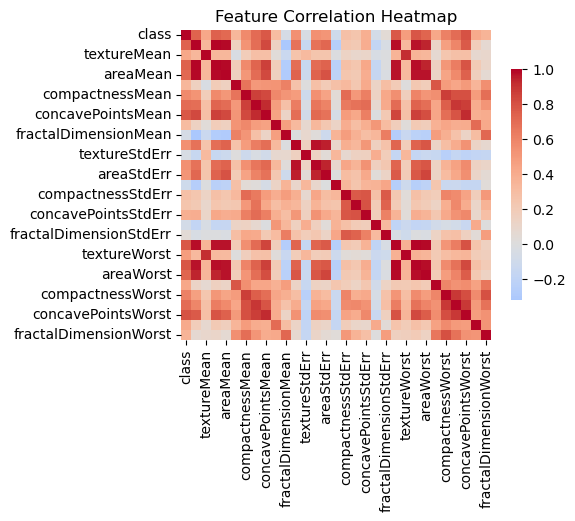

In [144]:
corr = BC_training.corr(numeric_only=True)

plt.figure(figsize=(5, 5))
sns.heatmap(corr, cmap='coolwarm', center=0, square=True, cbar_kws={'shrink': 0.6})
plt.title('Feature Correlation Heatmap')
plt.show()

In [145]:
corr_matrix = BC_training.corr(numeric_only=True).abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_pairs = [(col, row, corr_matrix.loc[row, col])
                   for col in upper.columns
                   for row in upper.index
                   if upper.loc[row, col] > CORRELATION_THRESHOLD]

print(f"Highly correlated feature pairs with r > {CORRELATION_THRESHOLD}:")
print(high_corr_pairs)



Highly correlated feature pairs with r > 0.9:
[('perimeterMean', 'radiusMean', 0.9979167338248981), ('areaMean', 'radiusMean', 0.98654436985379), ('areaMean', 'perimeterMean', 0.9857543372697306), ('concavePointsMean', 'concavityMean', 0.9226354247107258), ('perimeterStdErr', 'radiusStdErr', 0.9722445507731027), ('areaStdErr', 'radiusStdErr', 0.9444334211516957), ('areaStdErr', 'perimeterStdErr', 0.9367276517582619), ('radiusWorst', 'radiusMean', 0.9744127617538816), ('radiusWorst', 'perimeterMean', 0.9741655817291404), ('radiusWorst', 'areaMean', 0.9715769159287542), ('textureWorst', 'textureMean', 0.9142626925613859), ('perimeterWorst', 'radiusMean', 0.9696396836800123), ('perimeterWorst', 'perimeterMean', 0.974502009934599), ('perimeterWorst', 'areaMean', 0.9679095988140082), ('perimeterWorst', 'radiusWorst', 0.9941079753705229), ('areaWorst', 'radiusMean', 0.9424972960417224), ('areaWorst', 'perimeterMean', 0.943047414484047), ('areaWorst', 'areaMean', 0.9681401467208082), ('areaWo

#### Dropping Highly Correlated Features

In [ ]:
to_drop = [col for col in upper.columns if any(upper[col] > CORRELATION_THRESHOLD)]
print(f"Dropping: {to_drop}")

BC_training = BC_training.drop(columns=to_drop)
print(f"\nDropped {len(to_drop)} features. New shape: {BC_training.shape}")

### Outlier Detection

Interquartile Range (IQR) method

In [147]:
IQR_THRESHOLD_FACTOR = 2

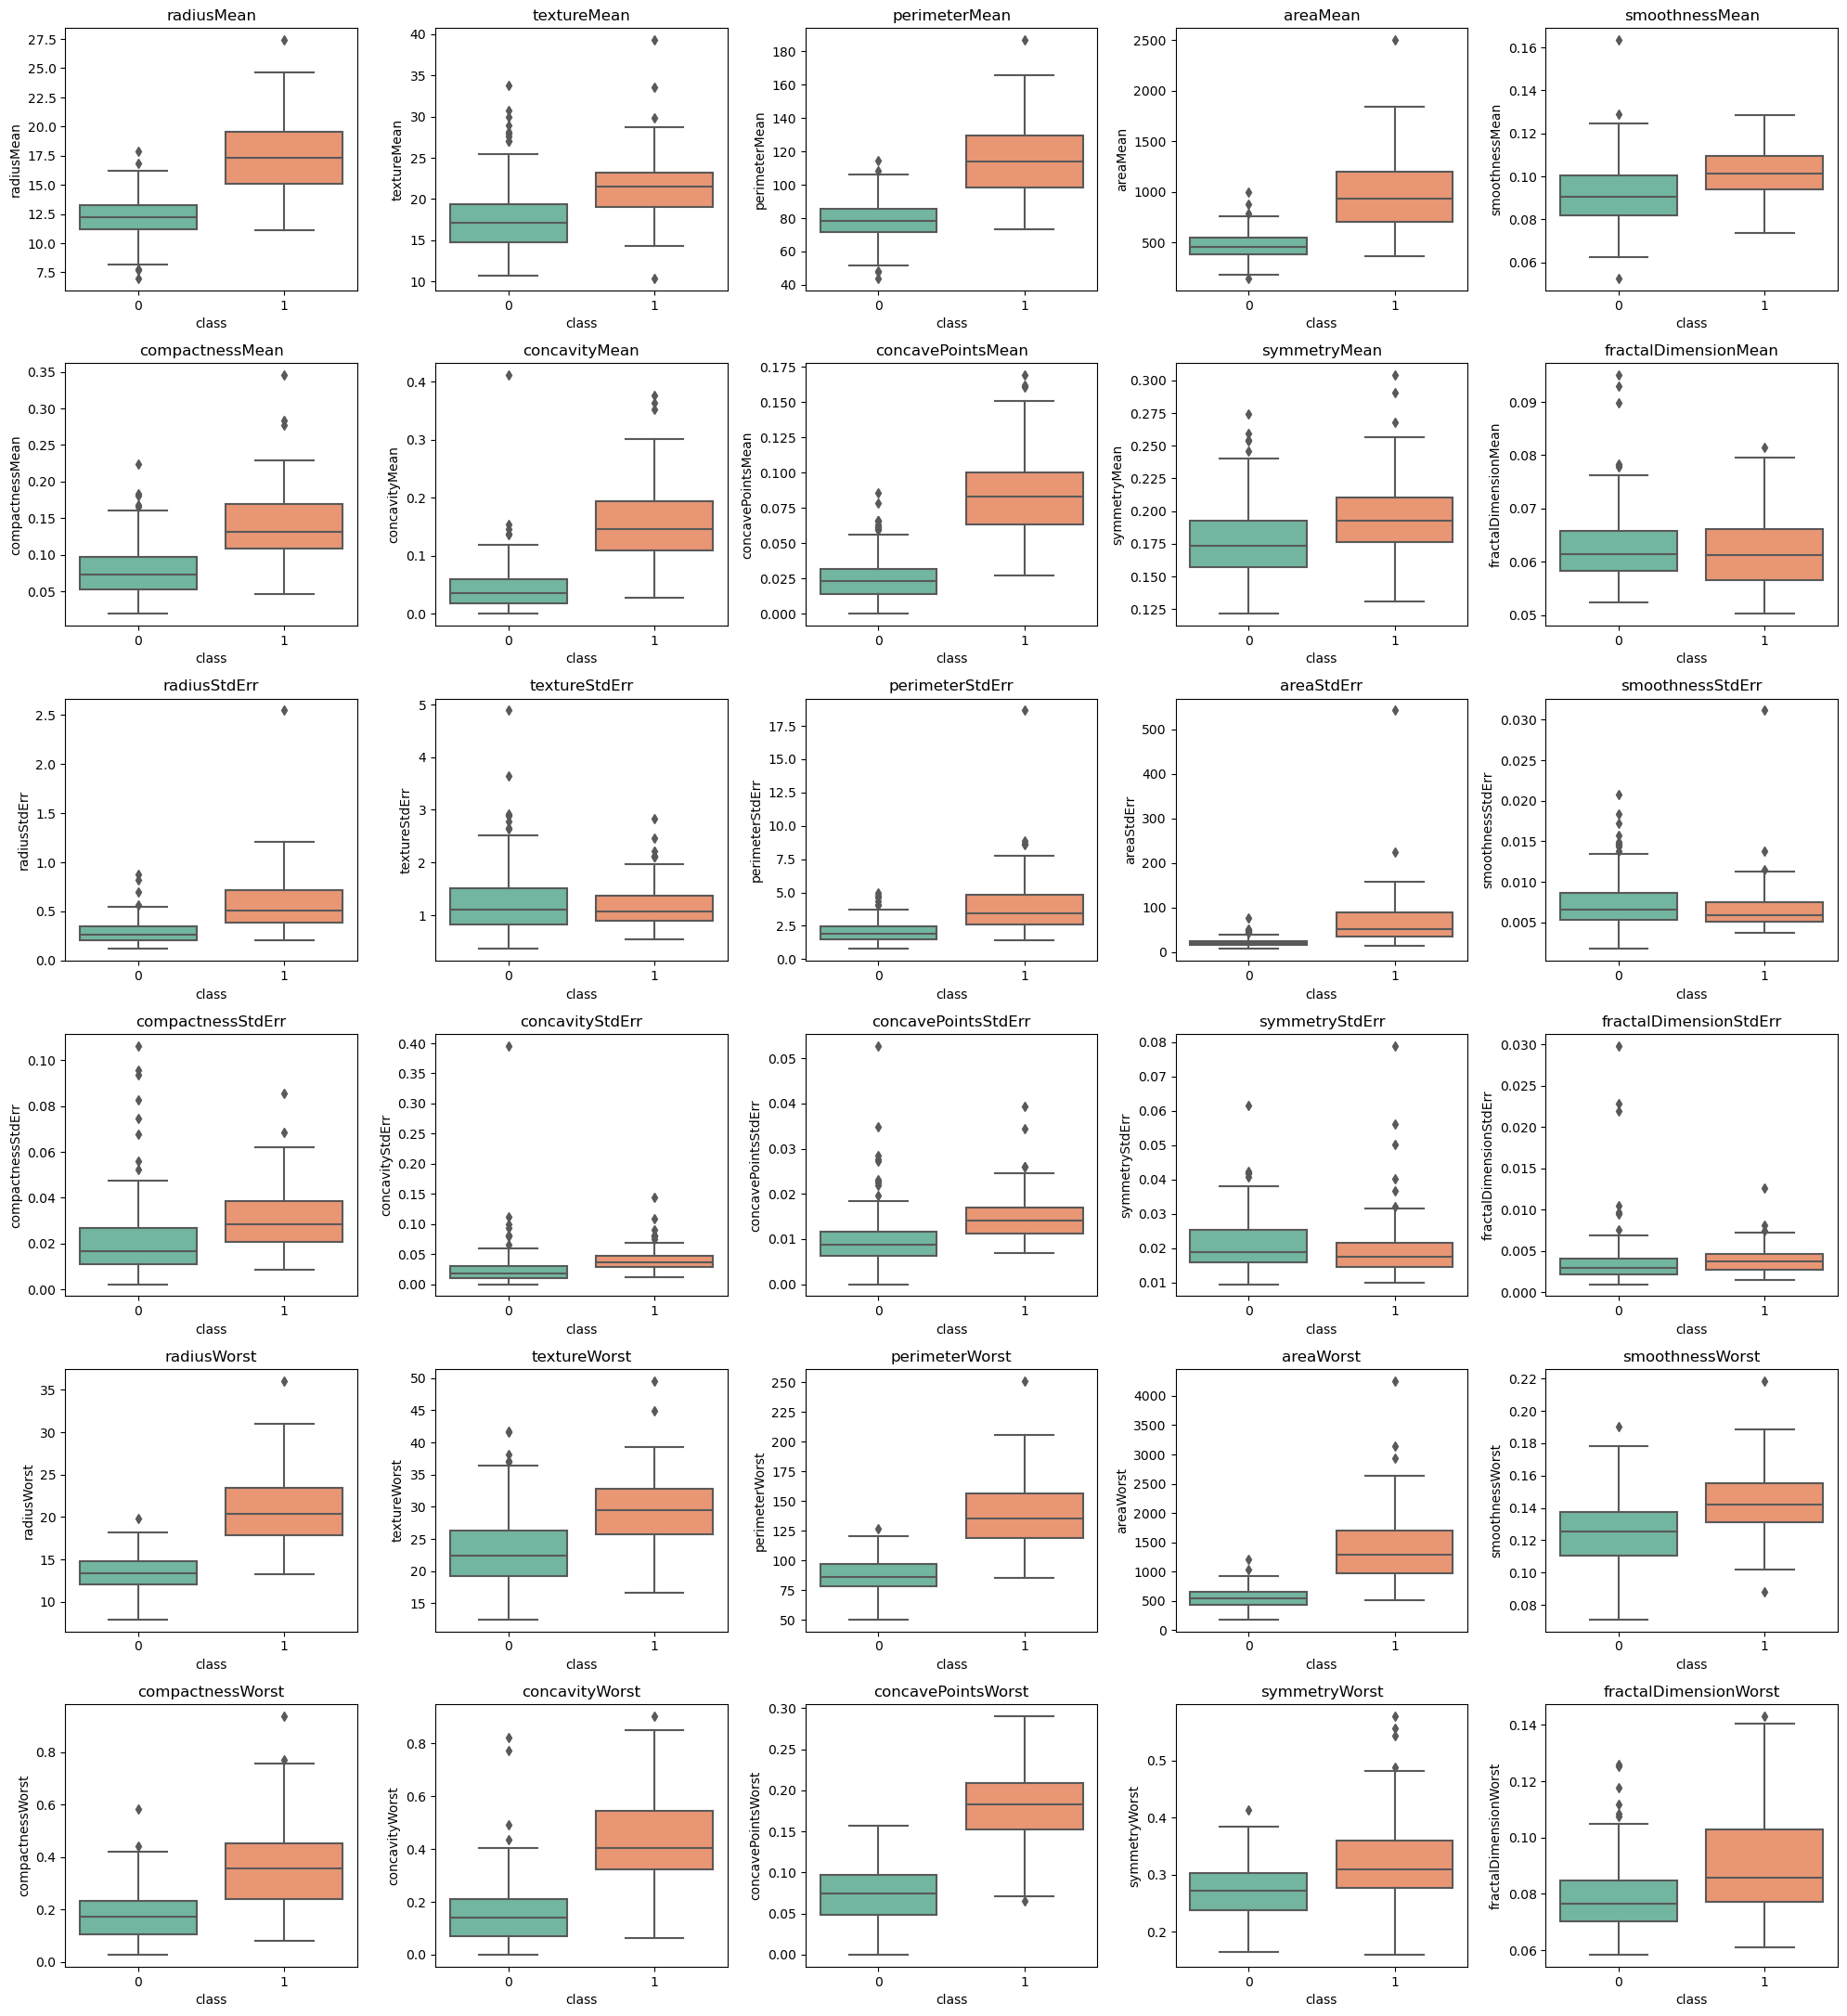

In [148]:
numeric_cols = BC_training.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'class' in numeric_cols:
    numeric_cols.remove('class')
    
plt.figure(figsize=(20, 25))
for i, col in enumerate(BC_training[numeric_cols]):
    plt.subplot(7, 5, i+1)
    sns.boxplot(x='class', y=BC_training[col], data=BC_training, palette='Set2')
    plt.title(col)
plt.tight_layout()
plt.show()


In [149]:
def iqr_outliers(df, cols):
    outlier_indices = set()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - IQR_THRESHOLD_FACTOR * IQR
        upper = Q3 + IQR_THRESHOLD_FACTOR * IQR
        out_idx = df[(df[col] < lower) | (df[col] > upper)].index
        
        if len(out_idx) > 0:
            print(col, out_idx.tolist())
        outlier_indices.update(out_idx)
        
    return list(outlier_indices)

iqr_outlier_idx = iqr_outliers(BC_training, BC_training[numeric_cols])

print(f"\nThreshold factor for IQR: {IQR_THRESHOLD_FACTOR}")
print(f"Total outliers detected: {len(iqr_outlier_idx)}")

radiusMean [194]
textureMean [122, 200]
perimeterMean [194]
areaMean [21, 185, 194, 265, 270]
smoothnessMean [165]
compactnessMean [133, 157, 193]
concavityMean [185, 193, 194, 264]
symmetryMean [31, 101, 193]
fractalDimensionMean [16, 165, 264]
radiusStdErr [31, 111, 113, 130, 157, 194, 213, 252, 265, 270, 275]
textureStdErr [79, 119, 173, 176, 210, 230, 240, 264]
perimeterStdErr [31, 72, 111, 113, 130, 157, 193, 194, 252, 265, 270, 275]
areaStdErr [9, 31, 61, 72, 94, 111, 113, 114, 130, 157, 193, 194, 213, 249, 252, 265, 270, 275]
smoothnessStdErr [5, 16, 18, 106, 119, 210, 266, 267, 273]
compactnessStdErr [5, 16, 106, 195, 247, 264]
concavityStdErr [5, 185, 193, 195, 247, 264, 267]
concavePointsStdErr [5, 23, 106, 230, 264]
symmetryStdErr [3, 6, 15, 25, 101, 119, 193, 195, 278]
fractalDimensionStdErr [5, 16, 127, 165, 195, 247, 264]
radiusWorst [194]
textureWorst [235]
perimeterWorst [194]
areaWorst [9, 21, 113, 130, 187, 194, 265, 270]
smoothnessWorst [42]
compactnessWorst [42, 86,

#### Removing outliers

In [ ]:
BC_training = BC_training.drop(index=iqr_outlier_idx).reset_index(drop=True)
print(f"New shape after outlier removal: {BC_training.shape}")

### Scale & Normalize Features

In [151]:
numeric_cols = BC_training.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'class' in numeric_cols:
    numeric_cols.remove('class')

scaler = StandardScaler()
BC_training_scaled = BC_training.copy()
BC_training_scaled[numeric_cols] = scaler.fit_transform(BC_training[numeric_cols])
print("Scaled training data.")

BC_validation_scaled = BC_validation.copy()
BC_validation_scaled[numeric_cols] = scaler.transform(BC_validation[numeric_cols])
print("Scaled validation data.")

BC_training_scaled.head()

Scaled training data.
Scaled validation data.


,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,0,-0.229487,-0.464913,-0.292042,-0.300598,-0.822055,-1.025978,-0.662134,-0.625803,-1.166398,...,-0.223253,-0.312117,-0.240797,-0.296587,-0.194299,-0.781255,-0.424457,-0.251690,-0.652954,-0.436087
1,0,-0.577163,-0.047953,-0.620977,-0.595028,-0.864595,-0.870129,-1.032977,-1.056186,-0.959787,...,-0.534956,0.236420,-0.609816,-0.552516,-0.136101,-0.754549,-1.094056,-0.932536,-0.057857,-0.153987
2,0,-0.103060,-0.096746,-0.117777,-0.228956,0.238573,0.085616,-0.419888,-0.270454,-0.402987,...,-0.229487,0.009712,-0.223096,-0.308666,0.472738,0.036203,-0.349745,0.217849,-0.107183,0.427385
3,1,-0.651870,-0.562499,-0.523839,-0.633761,0.955272,1.312927,1.062559,0.702139,2.972830,...,-0.514175,0.128615,-0.448108,-0.501576,0.293668,1.030180,0.938409,1.080601,4.546984,1.205613
4,1,1.138229,-0.502617,1.081648,0.991283,-0.460100,0.401210,0.309759,0.391242,-0.381976,...,0.865629,-0.562605,0.793054,0.724327,-0.252497,0.101339,0.831105,0.590570,-0.118322,-0.066904


## Classification

## Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train = BC_training_scaled.drop(columns=['class'])
y_train = BC_training_scaled['class']
X_val = BC_validation_scaled[X_train.columns]
y_val = BC_sample_solution['class']

clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

print(X_val.shape, y_val.shape)
print(X_val.head())
print(y_val.head())



Accuracy: 0.6443661971830986
              precision    recall  f1-score   support

           0       1.00      0.64      0.78       284
           1       0.00      0.00      0.00         0

    accuracy                           0.64       284
   macro avg       0.50      0.32      0.39       284
weighted avg       1.00      0.64      0.78       284

[[183 101]
 [  0   0]]
(284, 30) (284,)
   radiusMean  textureMean  perimeterMean  areaMean  smoothnessMean  \
0   -1.031153     0.164963      -1.035377 -0.908388        0.803857   
1   -0.841511    -1.119186      -0.846937 -0.771803       -1.666375   
2    0.123935    -1.824470       0.113603 -0.025971        1.027375   
3   -1.444341    -0.047953      -1.312616 -1.179811        0.276067   
4   -0.761057     0.280293      -0.582622 -0.767434        3.363496   

   compactnessMean  concavityMean  concavePointsMean  symmetryMean  \
0        -0.835647      -0.493184          -0.461384     -0.322444   
1        -0.817530      -0.536314    

/home/lisa/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lisa/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lisa/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
